In [1]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as mp
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

c:\Users\Easy Data\Dropbox\PC\Desktop\ITSE\DATA SIENCE\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


RECOLECCIÓN DE DATOS 

In [2]:
ruta = r"C:\Users\Easy Data\.cache\kagglehub\datasets\iabhishekofficial\mobile-price-classification\versions\1\train.csv"
df = pd.read_csv(ruta)

EXPLORACIÓN DE DATOS

In [3]:
print(df.shape)
print(df.info())
print(df.columns)
print(df.describe())

(2000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 1

CORRELACIÓN

               battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008

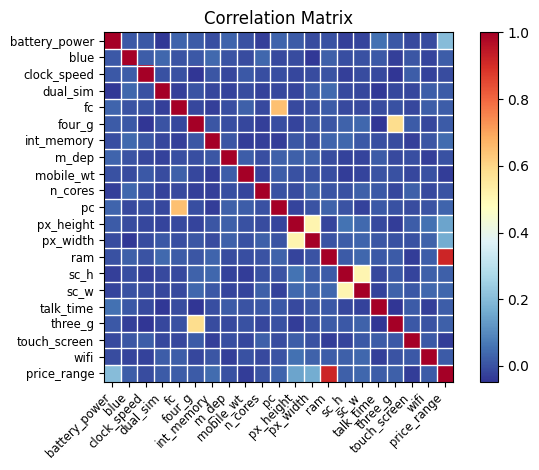

In [4]:
carrelacion = df.corr()
print(carrelacion)
sm.graphics.plot_corr(carrelacion, xnames=df.columns)
mp.show()

In [5]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)
print(df_numeric_scaled)

      battery_power  blue  clock_speed  dual_sim        fc  four_g  \
0          0.227789   0.0         0.68       0.0  0.052632     0.0   
1          0.347361   1.0         0.00       1.0  0.000000     1.0   
2          0.041416   1.0         0.00       1.0  0.105263     1.0   
3          0.076152   1.0         0.80       0.0  0.000000     0.0   
4          0.881764   1.0         0.28       0.0  0.684211     1.0   
...             ...   ...          ...       ...       ...     ...   
1995       0.195725   1.0         0.00       1.0  0.000000     1.0   
1996       0.977956   1.0         0.84       1.0  0.000000     0.0   
1997       0.941884   0.0         0.16       1.0  0.052632     1.0   
1998       0.675351   0.0         0.16       0.0  0.210526     1.0   
1999       0.006012   1.0         0.60       1.0  0.263158     1.0   

      int_memory     m_dep  mobile_wt   n_cores  ...  px_height  px_width  \
0       0.080645  0.555556   0.900000  0.142857  ...   0.010204  0.170895   
1    

In [13]:
X = df[['ram']] 
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
nuevas_ram = [[500], [1000], [1500], [2000], [2500], [3000], [3500], [4000]]
nuevasram2=[[500]]
predicciones = modelo.predict(nuevas_ram)


c:\Users\Easy Data\Dropbox\PC\Desktop\ITSE\DATA SIENCE\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
nuevas_ram = [[500], [1000], [1500], [2000], [2500], [3000], [3500], [4000]]
for ram, precio in zip(nuevas_ram, predicciones):
    print(f'Predicción de precio para {ram[0]} MB RAM: {precio:.2f}')

Predicción de precio para 500 MB RAM: -0.03
Predicción de precio para 1000 MB RAM: 0.44
Predicción de precio para 1500 MB RAM: 0.91
Predicción de precio para 2000 MB RAM: 1.38
Predicción de precio para 2500 MB RAM: 1.85
Predicción de precio para 3000 MB RAM: 2.32
Predicción de precio para 3500 MB RAM: 2.79
Predicción de precio para 4000 MB RAM: 3.26
